In [9]:
from torchvision import models,transforms
from PIL import Image
import matplotlib.pyplot as plt
from Dataset.HatefulMemeDataset import HatefulMemeDataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
import torch
device = 'cpu'

In [ ]:
# model = models.segmentation.fcn_resnet50(pretrained=True).to(device).eval()
# model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device).eval() #mask_rcnn
# model = models.detection.maskrcnn_resnet50_fpn_v2(pretrained=True).to(device).eval() #mask_rcnn
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).to(device).eval() #mask_rcnn



In [24]:
image_transform = transforms.Compose(
            [
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor()
            ]
        )
model_name = 'Hate-speech-CNERG/bert-base-uncased-hatexplain'
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)
dataset = HatefulMemeDataset('./data','train',image_transform,tokenizer)
train_loader = DataLoader(dataset, batch_size=3, shuffle=True,collate_fn=dataset.collate_fn)

In [ ]:
for images, tokenized_text, attention_masks, labels in train_loader:
    print(type(images))
    outputs = model(images)

    break


In [29]:
outputs[1]['masks'].shape

torch.Size([1, 1, 224, 224])

In [30]:
masks = []
for i,output in enumerate(outputs):
    masks.append(output['masks']*images[i])

# x = torch.stack([ ])

In [34]:
from Models.Encoder import ImageEncoder,TextEncoder,ProjectionHead
imgModel = ImageEncoder()
image_projection = ProjectionHead(2048)

In [35]:
y = image_projection(imgModel(masks[0]))

In [36]:
y.shape

torch.Size([7, 256])

In [ ]:
for output in outputs:
    outputs['masks']

In [146]:
outputs[0].keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [147]:
imgMaskeds = imgTensor*outputs[0]['masks']
imgMaskeds.shape

torch.Size([6, 3, 224, 224])

In [148]:
outputs[0]['scores']

tensor([0.9991, 0.2530, 0.1920, 0.1339, 0.1162, 0.1092],
       grad_fn=<IndexBackward0>)

In [149]:
outputs[0]['scores']

tensor([0.9991, 0.2530, 0.1920, 0.1339, 0.1162, 0.1092],
       grad_fn=<IndexBackward0>)

In [150]:
masked = []
for i in range(len(outputs[0]['scores'])):
    if outputs[0]['scores'][i]>0.5:
        masked.append(i)
masked

[0]

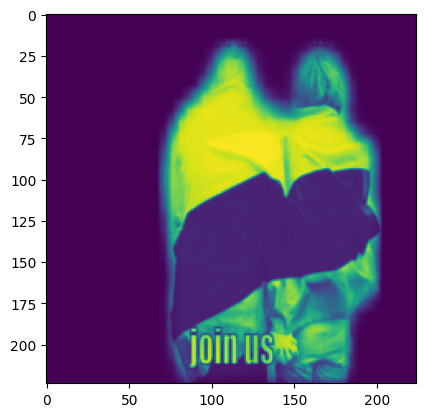

In [151]:
imgMasked = imgMaskeds[0][0,:,:].detach().numpy()
plt.imshow(imgMasked)


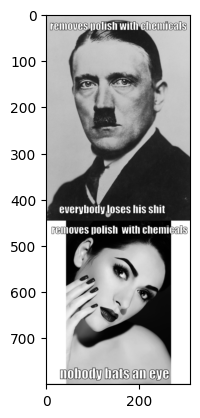

In [83]:
# x=outputs['aux'][0,:,:].detach().numpy()
plt.imshow(image)


In [22]:
x.shape

(21, 800, 312)